Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


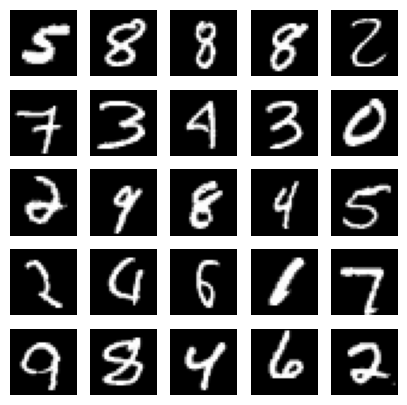

In [27]:
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import tensorflow as ts
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical, plot_model
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

path = 'C:/Users/m.faridi/mnist.npz'
with np.load(path, allow_pickle=True) as f:
    x_train, y_train = f['x_train'], f['y_train']
    x_test, y_test = f['x_test'], f['y_test']



unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))



unique, counts = np.unique(y_test, return_counts=True)
print("Test labels: ", dict(zip(unique, counts)))
# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]
# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
plt.savefig("mnist-samples.png")
plt.show()
plt.close('all')




num_labels = len(np.unique(y_train))
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size
# resize and normalize
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255
# network parameters
batch_size = 64
hidden_units = 128
dropout = 0.45


In [24]:


model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
# this is the output for one-hot vector
model.add(Activation('softmax'))
model.summary()
#plot_model(model, to_file='mlp-mnist.png', show_shapes=True)
# loss function for one-hot vector
# use of adam optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
optimizer='adam',
metrics=['accuracy'])
# train the network
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)



Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               100480    
                                                                 
 activation_12 (Activation)  (None, 128)               0         
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 128)               16512     
                                                                 
 activation_13 (Activation)  (None, 128)               0         
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_14 (Dense)            (None, 10)               

In [25]:
me, acc = model.evaluate(x_test,y_test,batch_size=batch_size,verbose=0)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))


Test accuracy: 97.8%


In [15]:
me = model.evaluate(x_test,y_test,batch_size=batch_size,verbose=0)
me

[0.065761499106884, 0.9815000295639038]

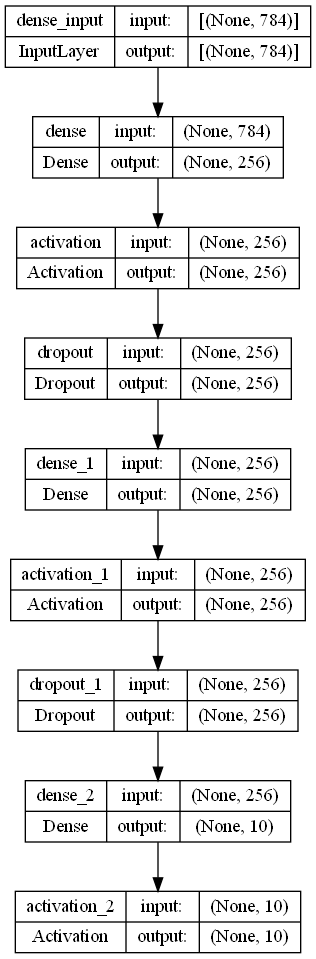

In [4]:
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

In [28]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split

In [29]:
model = LogisticRegression(multi_class='multinomial',C=50.0, tol=0.01, 
                           penalty="l1", 
                           solver="saga") 
  
model.fit(x_train, y_test) 

ValueError: y should be a 1d array, got an array of shape (10000, 10) instead.